# Python Feature Engineering Cookbook
    
    AUTHOR: Dr. Soledad Galli

### Chapter 3: Transforming Numerical Variables

Variable transformation consists of **replacing the original variable values with a function of that variable**. More generally, transforming variables with mathematical functions helps...

- reduce variable skewness
- improve the value spread
- sometimes unmask linear and additive relationships between predictors and the target.

Commonly used mathematical transformations aimed to **bring the distribution fo thhe variance to a more simmetric, Guassian, shape**, also known as **variance stabilization transformations** are...
- Logarithm
- Reciprocal
- Power
- Square
- Cube Root
- Box-Cox
- Yeo-Johnson

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Plot histogram and Q-Q plots to explore the variable distribution

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

# Logarithm transformation

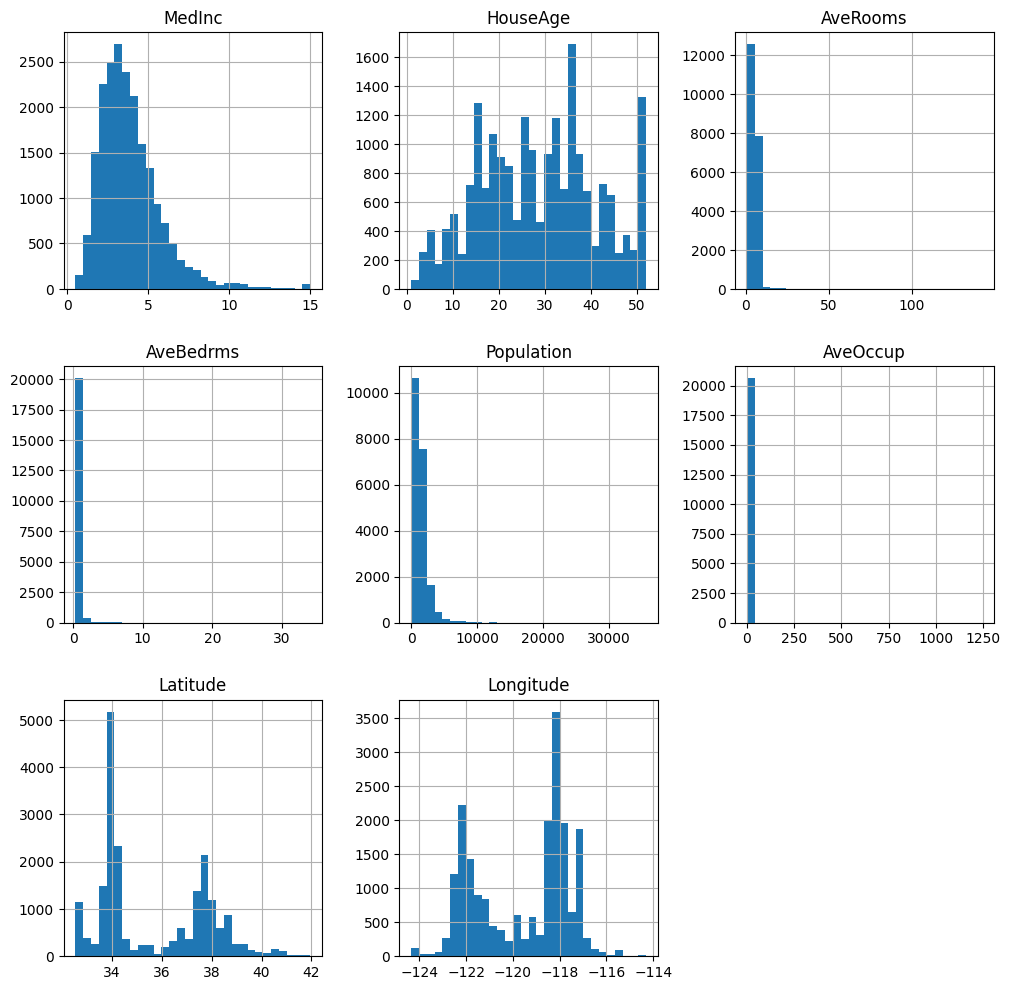

In [4]:
# Plot histograms to inspect variable distributions
X.hist(bins=30, figsize=(12, 12))
plt.show()

In the following output, we can see that the `MedInc` variable shows a mild right-skewed distribution, variables such as `AveRooms` and `Population` are heavily right-skewed, and that the `HouseAge` variable shows an even spread of values across its range.

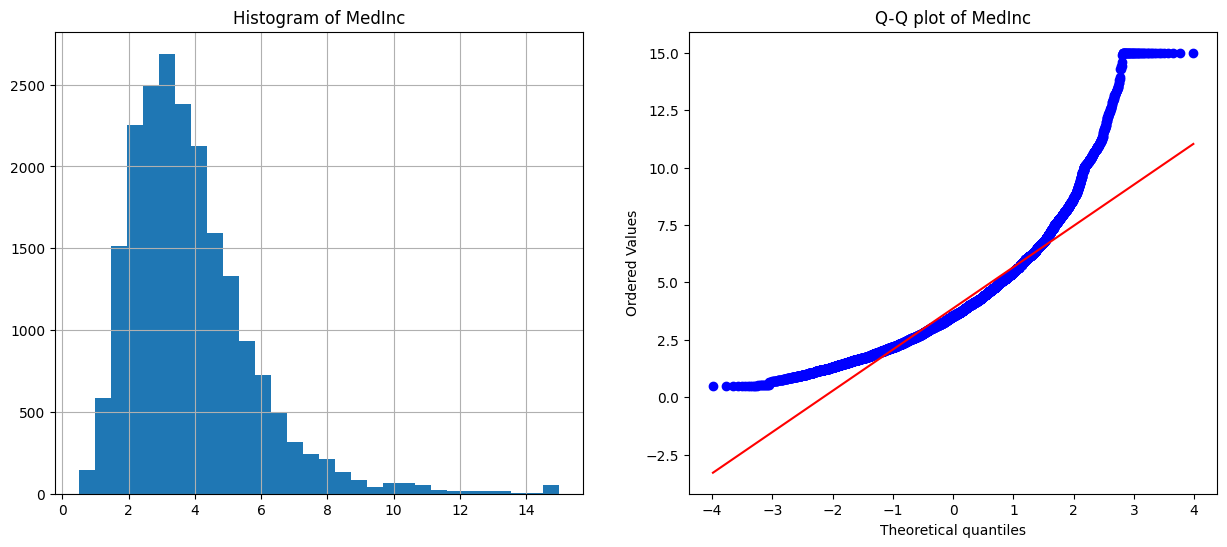

In [5]:
# Check function output
diagnostic_plots(X, "MedInc")

## What is a Q-Q Plot?

A Q-Q (Quantile-Quantile) plot compares the quantiles of your data against a theoretical distribution (usually normal distribution).

## How to Read Your Q-Q Plot:

### The Components:
- **Blue dots** = Your actual data quantiles
- **Red diagonal line** = Perfect normal distribution reference
- **X-axis** = Theoretical quantiles (expected normal values)
- **Y-axis** = Observed quantiles (your actual data)

## Interpreting Your Specific Plot:

### 1. Overall Shape: S-Curve Pattern
Your data shows a characteristic **S-shaped curve**:
- **Bottom left**: Blue dots are slightly below the red line
- **Middle**: Blue dots curve upward above the red line  
- **Top right**: Blue dots flatten horizontally (ceiling effect)

### 2. What This Means:

#### Right-Skewed Distribution:
- Your data is **not normally distributed**
- It has a **long tail to the right** (few high values)
- Most data points are concentrated on the left side

#### Ceiling Effect:
- The horizontal flattening at the top indicates:
  - **Maximum value limit** in your data
  - **Many identical high values** (saturation)
  - **Truncated upper tail**

## Step-by-Step Interpretation:

### Left Side (Low Values):
- Blue dots slightly below red line
- **Meaning**: Your data has fewer very low values than expected in a normal distribution

### Middle Section:
- Blue dots curve above red line
- **Meaning**: Your data has more moderate values than expected

### Right Side (High Values):
- Blue dots flatten horizontally
- **Meaning**: 
  - Your data hits a **maximum limit**
  - Many observations have the **same high value**
  - **Ceiling effect** - data cannot go higher

## Real-World Examples:

This pattern is common in:
- **Income data** (most people earn moderate amounts, few earn very high)
- **Test scores** (many people score near maximum)
- **Sales data** (limited by market size)
- **Response times** (natural upper limit)

## Key Takeaways:

1. **Not Normal**: Your data doesn't follow a normal distribution
2. **Right-Skewed**: Most values are low, few are very high
3. **Ceiling Effect**: Data hits an upper limit
4. **Transformation Needed**: You might want to apply log, square root, or other transformations

## Next Steps:

For data like this, consider:
- **Log transformation** to reduce skewness
- **Square root transformation** for count data
- **Box-Cox transformation** for optimal normalization
- **Non-parametric tests** instead of parametric ones

The Q-Q plot is telling you that your data needs preprocessing before using methods that assume normality!

## Logarithmic transformation with NumPy

In [22]:
# make a copy of the dataframe where we will store the modified variables
X_tf = X.copy()

# list with the variables to transform
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# apply log to a set of variables
X_tf[variables] = np.log(X[variables])

In [25]:
from IPython.display import display_html

display_html(
    X_tf[variables].head().to_html(index=False) +
    X[variables].head().to_html(index=False),
    raw=True
)

MedInc,AveRooms,AveBedrms,Population
2.119287,1.943640,0.023530,5.774552
2.116424,1.830682,-0.028522,7.783641
1.982022,2.114825,0.070874,6.206576
1.730434,1.760845,0.070514,6.324359
1.347086,1.837665,0.077962,6.336826
MedInc,AveRooms,AveBedrms,Population
8.3252,6.984127,1.023810,322.0
8.3014,6.238137,0.971880,2401.0
7.2574,8.288136,1.073446,496.0
5.6431,5.817352,1.073059,558.0


**Logarithm transformation can only be applied to strictly positive variables**. If the variables have zero or negative values, sometimes, it is useful to add a constant to make those values positive. We could add a constant value of 1 using `X_tf[variables] = np.log(X[variables] + 1)`

Before Logarithmic transformation


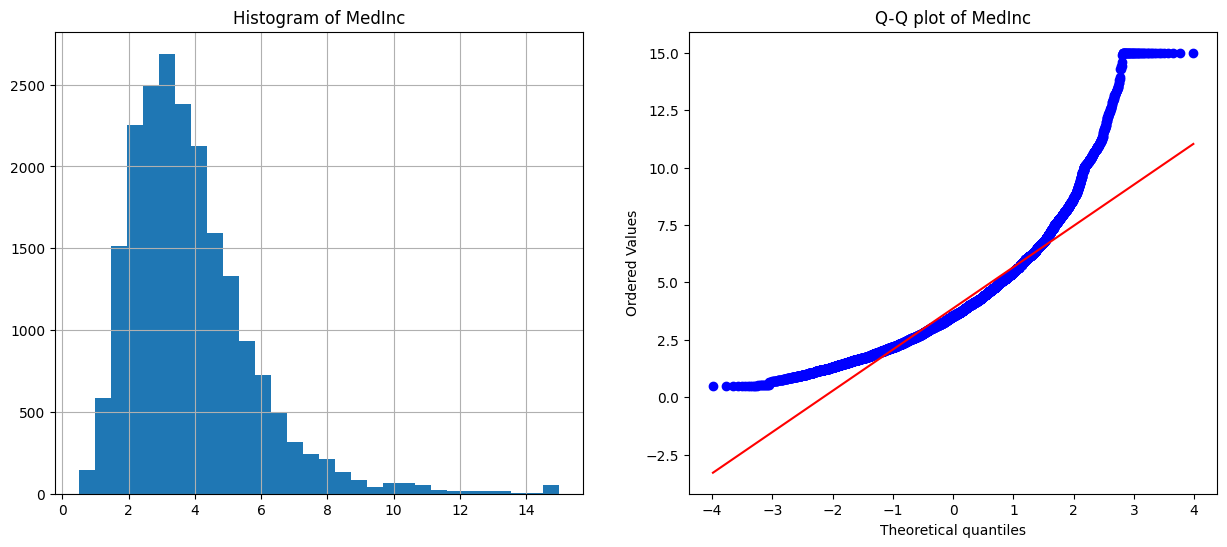

After Logarithmic transformation


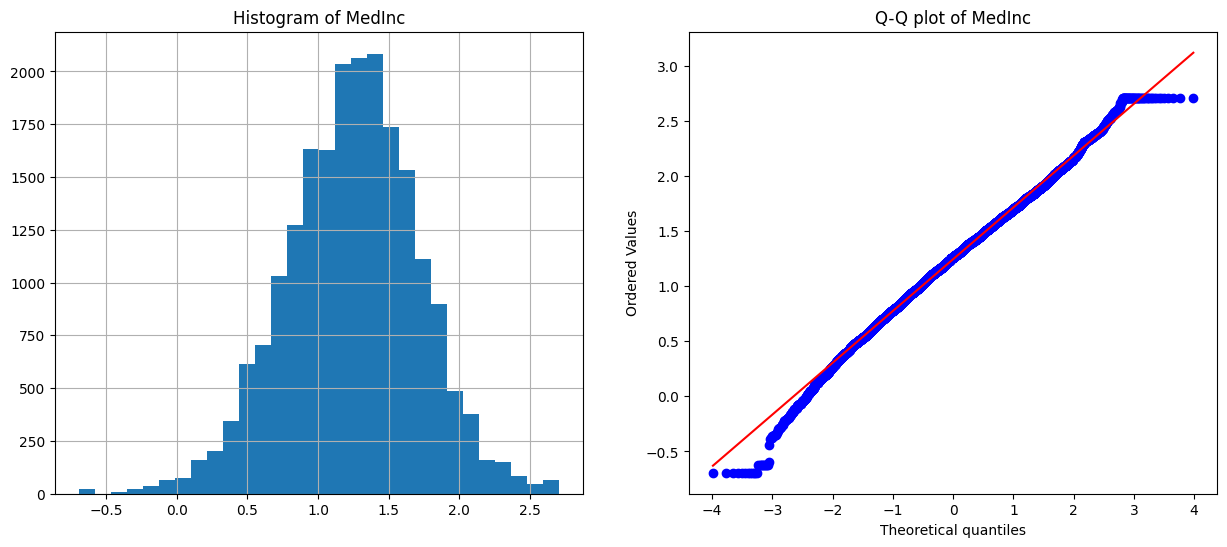

In [27]:
# Display both the transformed and original variable using diagnostic plots
print("Before Logarithmic transformation")
diagnostic_plots(X, "MedInc")
print("After Logarithmic transformation")
diagnostic_plots(X_tf, "MedInc")

Before Logarithmic transformation


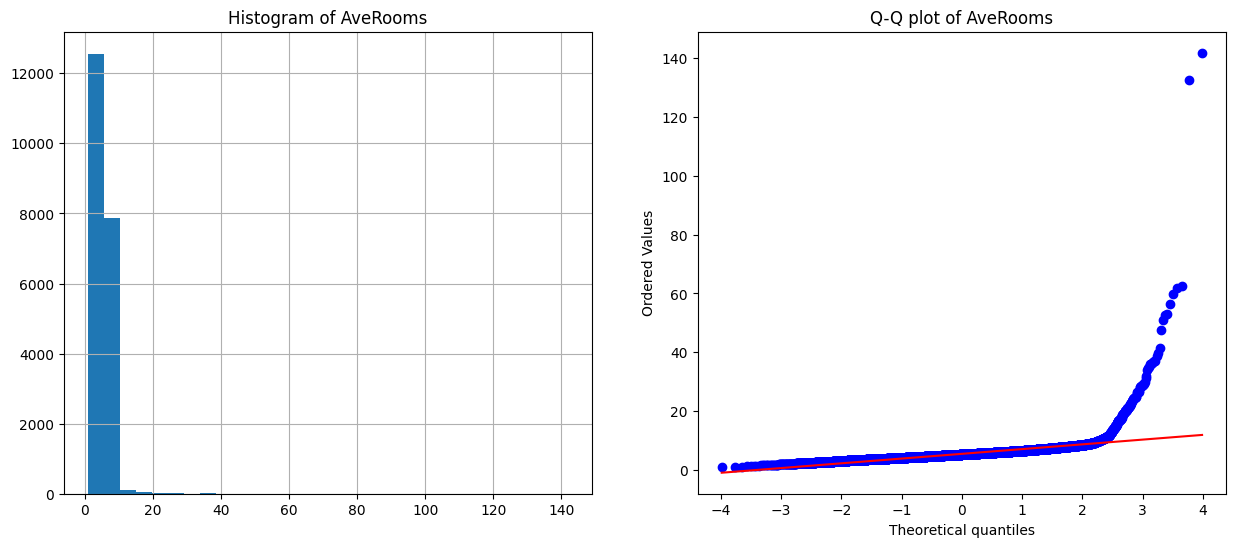

After Logarithmic transformation


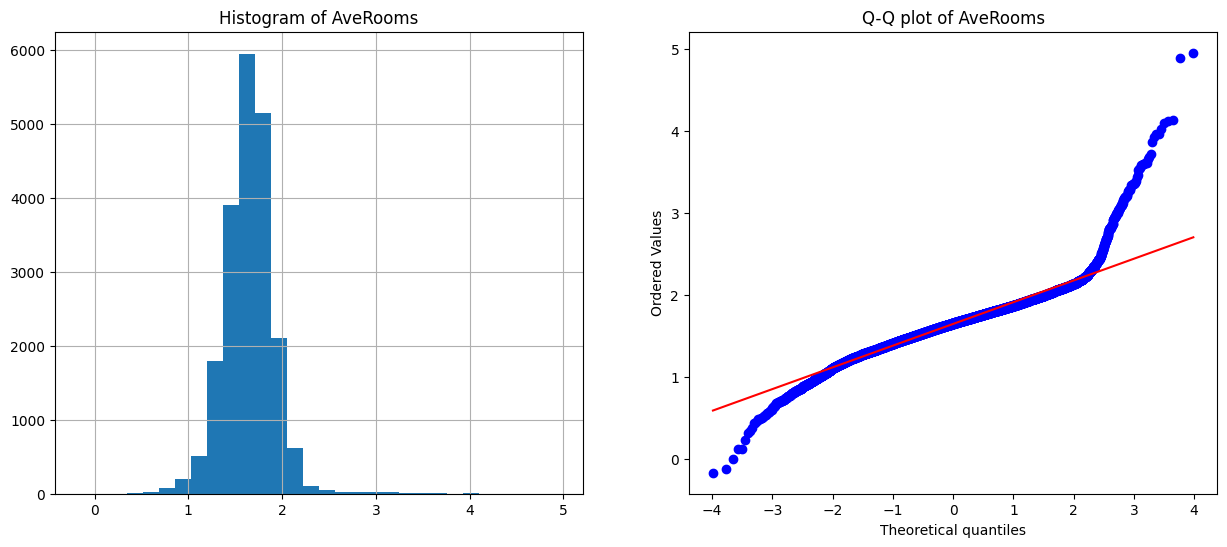

In [28]:
print("Before Logarithmic transformation")
diagnostic_plots(X, "AveRooms")
print("After Logarithmic transformation")
diagnostic_plots(X_tf, "AveRooms")

Before Logarithmic transformation


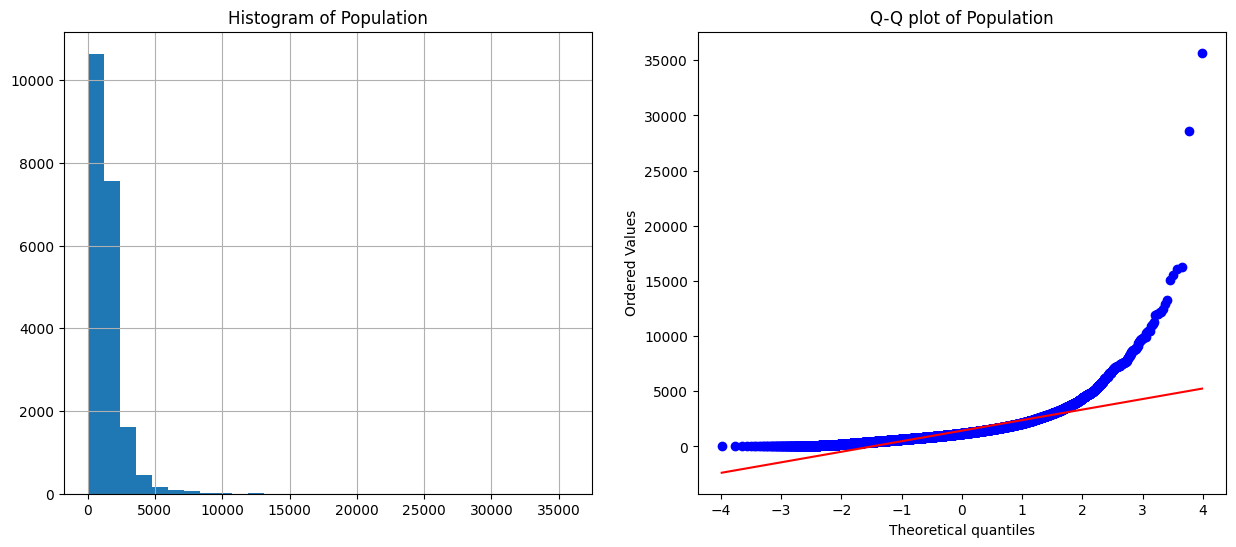

After Logarithmic transformation


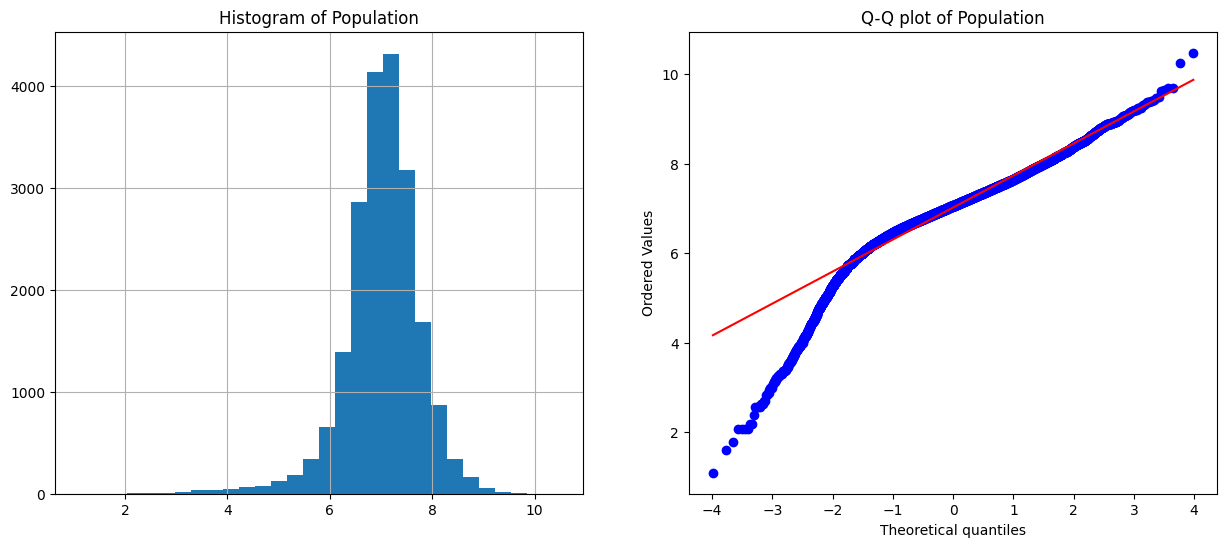

In [29]:
print("Before Logarithmic transformation")
diagnostic_plots(X, "Population")
print("After Logarithmic transformation")
diagnostic_plots(X_tf, "Population")

## Logarithmic transformation with Scikit-learn

In [35]:
from sklearn.preprocessing import FunctionTransformer

In [36]:
# make a copy of the dataframe where we will store the modified variables
X_tf = X.copy()

# set up the transformer with NumPy log as parameter so we can apply the logarithm and also revert back to its original representation
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

# transform subset of dataframe (remember that we made a copy earlier.)
X_tf[variables] = transformer.transform(X[variables])

>To add a constant value to the variables, in case they are not strictly positive, we can set up `FunctionTransformer()` using `transformer = FunctionTransformer(lambda x: np.log(x + 1))`.

>If we set up `FunctionTransformer()` with the default parameter, `validate=False`, we don’t need to fit the transformer before transforming the data. If we set `validate=True`, the transformer will check the input data to the fit method. The latter is useful when fitting the transformer with a DataFrame so that it learns and stores the variable names.

In [39]:
display_html(
    X[variables].head().to_html(index=False) +
    X_tf[variables].head().to_html(index=False),
    raw=True
)

MedInc,AveRooms,AveBedrms,Population
8.3252,6.984127,1.023810,322.0
8.3014,6.238137,0.971880,2401.0
7.2574,8.288136,1.073446,496.0
5.6431,5.817352,1.073059,558.0
3.8462,6.281853,1.081081,565.0
MedInc,AveRooms,AveBedrms,Population
2.119287,1.943640,0.023530,5.774552
2.116424,1.830682,-0.028522,7.783641
1.982022,2.114825,0.070874,6.206576
1.730434,1.760845,0.070514,6.324359


Before Logarithmic transformation


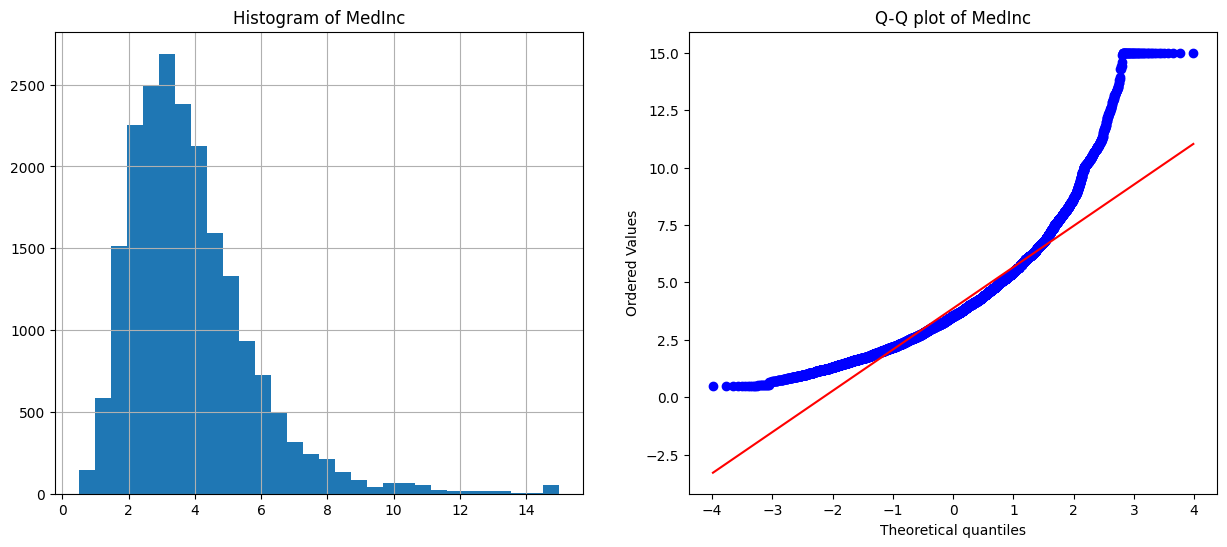

After Logarithmic transformation


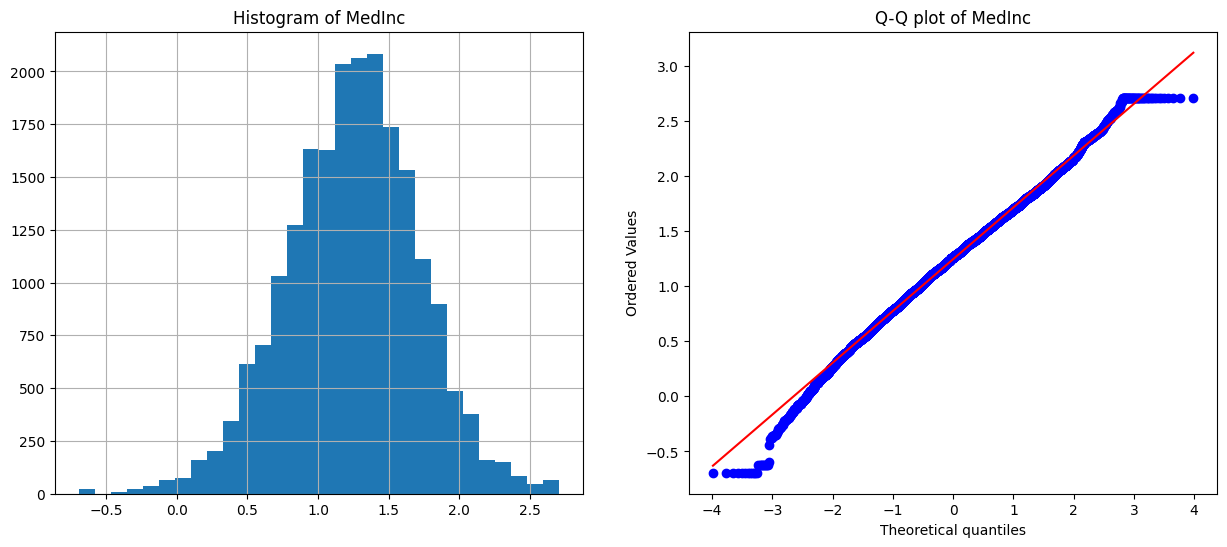

In [37]:
# use diagnostic plot function to corroborate variable transformation
print("Before Logarithmic transformation")
diagnostic_plots(X, "MedInc")
print("After Logarithmic transformation")
diagnostic_plots(X_tf, "MedInc")

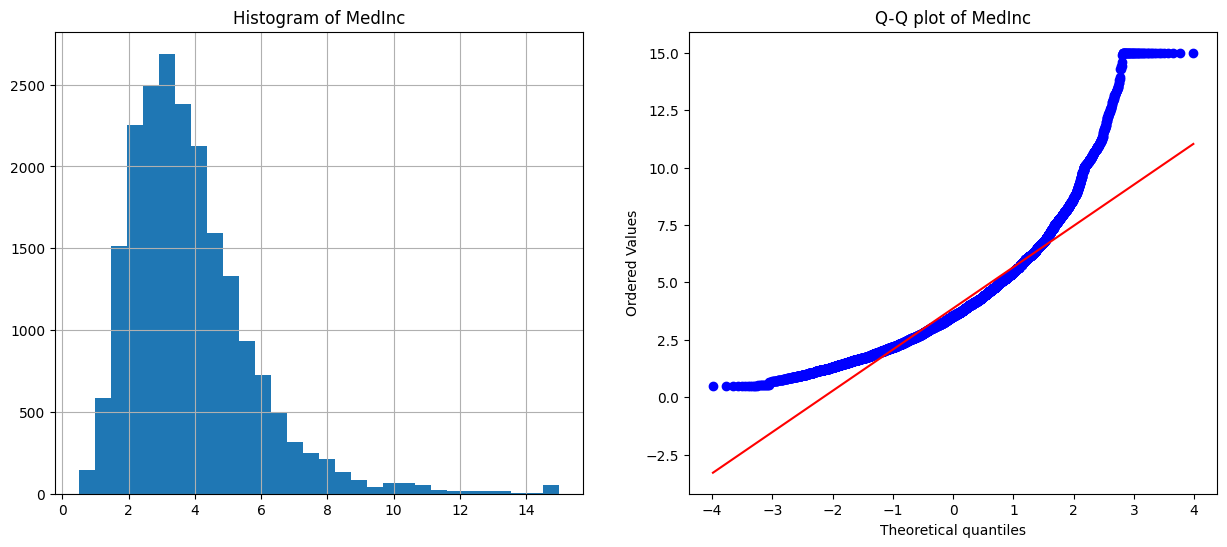

In [18]:
# revert to the original representation

X_tf[variables] = transformer.inverse_transform(X_tf[variables])

diagnostic_plots(X_tf, "MedInc")

# Reciprocal transformation

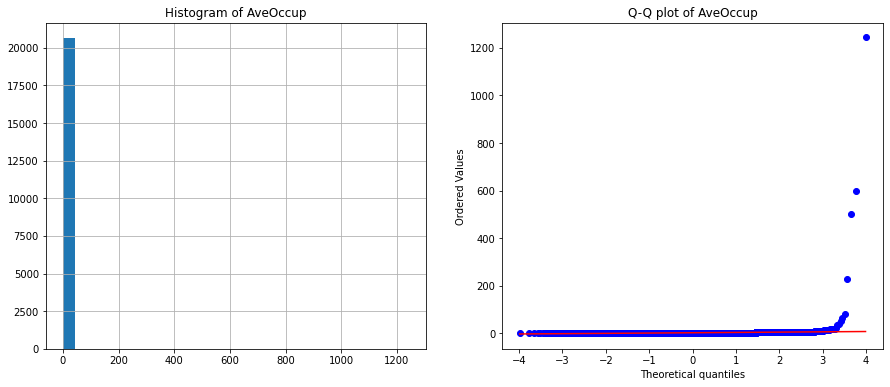

In [206]:
# Check function output

# AveOccup = average number of household members (number of people per household)
# AveOccup = number of members / number of houses

diagnostic_plots(X, "AveOccup")

## Reciprocal transformation with NumPy

In [ ]:
# make a copy of the dataframe where we will store the modified variables
X_tf = X.copy()

# apply the reciprocal to a set of variables
X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

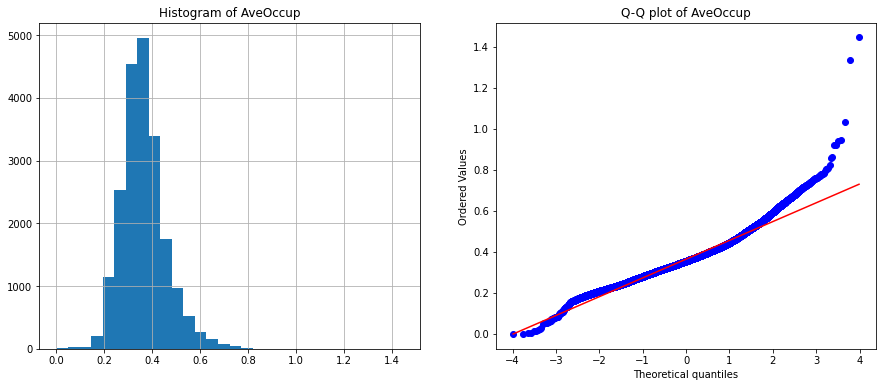

In [ ]:
# use diagnostic plot function to corroborate variable transformation
# AveOccup = number of households per number of people)
# AveOccup = number of houses / number of people

diagnostic_plots(X_tf, "AveOccup")

## Reciprocal transformation with Scikit-learn

In [41]:
from sklearn.preprocessing import FunctionTransformer

In [42]:
# make a copy of the dataframe where we will store the modified variables
X_tf = X.copy()

# start the transformer with NumPy reciprocal as parameter
transformer = FunctionTransformer(func=np.reciprocal)

# transform subset of dataframe
X_tf["AveOccup"] = transformer.transform(X["AveOccup"])

> the inverse of the reciprocal function is the reciprocal function, so if you transform the transformed data, you revert it to its original representation.

Before Reciprocal Transformation


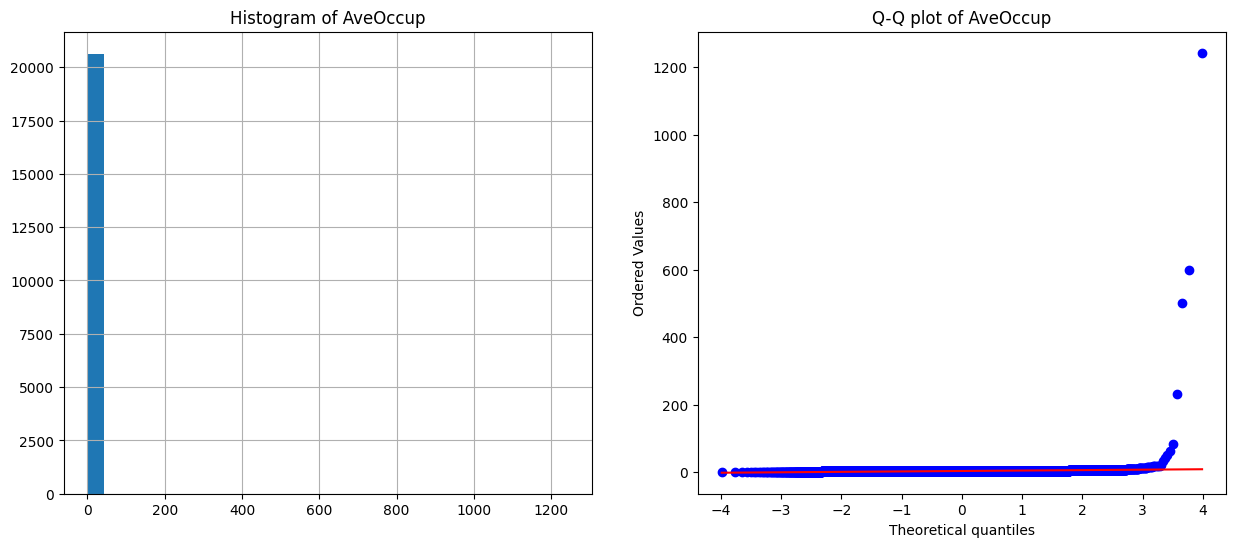

After Reciprocal Transformation


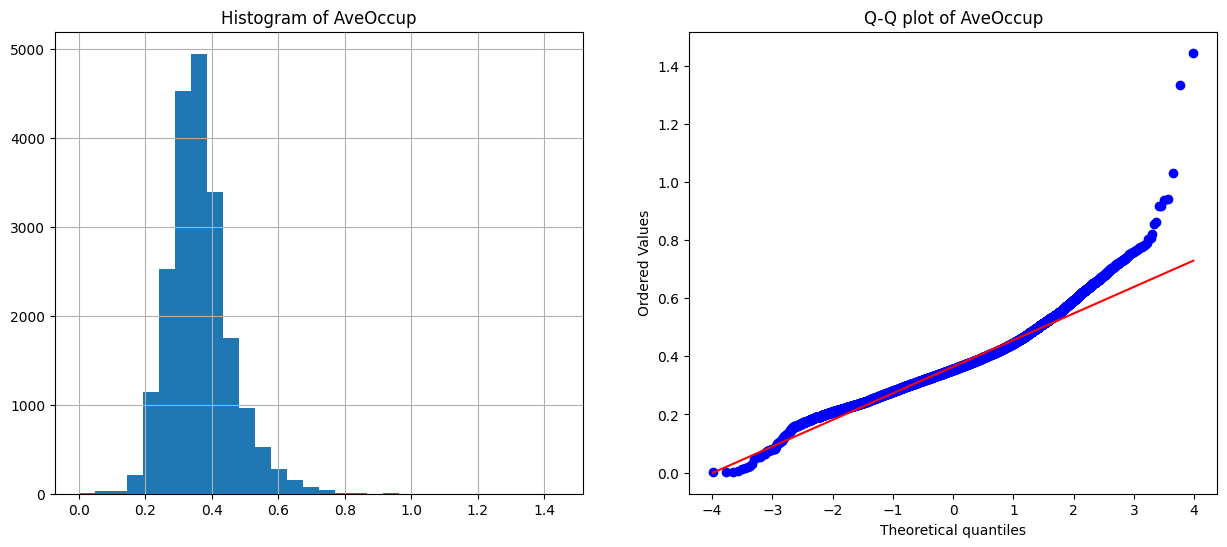

In [43]:
# use diagnostic plot function to corroborate variable transformation
print("Before Reciprocal Transformation")
diagnostic_plots(X, "AveOccup")
print("After Reciprocal Transformation")
diagnostic_plots(X_tf, "AveOccup")

# Square-root transformation

The square root transformation, $√x$, as well as its variations, the Anscombe transformation, $√(x+3/8)$, and the Freeman-Tukey transformation, $√x + √(x+1)$, are variance stabilizing transformations that **transform a variable with a Poisson distribution into one with an approximately standard Gaussian distribution**.

The **Poisson distribution** is a probability distribution that indicates the **number of times an event is likely to occur**. In other words, it is a count distribution. It is **right-skewed** and its **variance equals its mean**.

Examples of variables that could follow a Poisson distribution are...
- Number of financial items of a customer
    - Number of current accounts or credit cards
- Number of passangers in a vehicle
- Number of occupants in a housefold

In [215]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,3,5
1,3,1
2,5,2
3,3,1
4,1,0


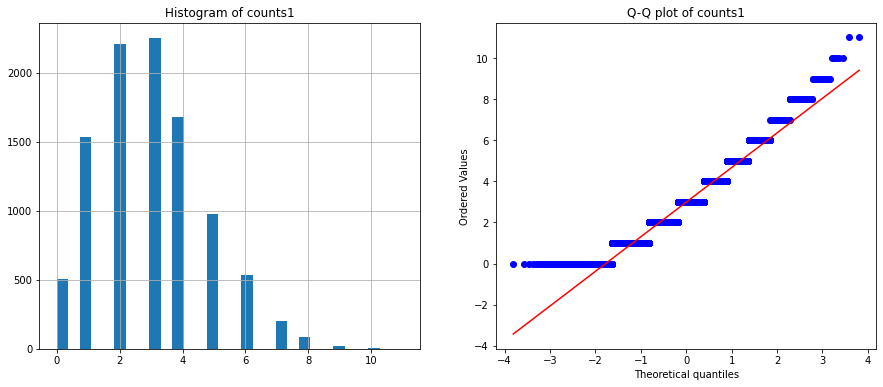

In [216]:
diagnostic_plots(df, "counts1")

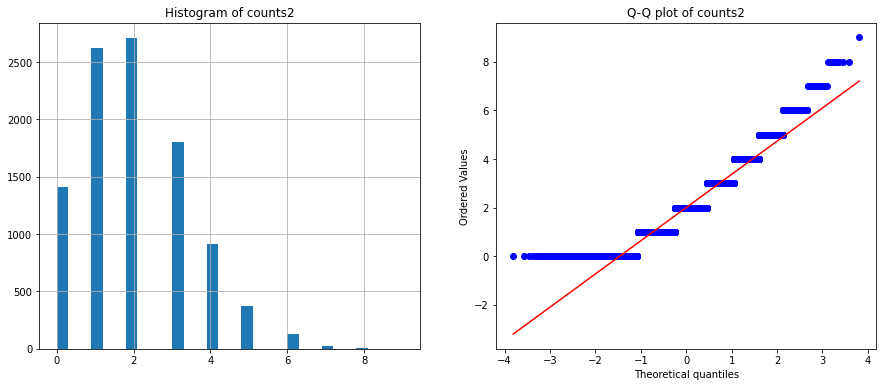

In [217]:
diagnostic_plots(df, "counts2")

## Square root with NumPy

In [218]:
# make a copy of the dataframe

df_tf = df.copy()

In [219]:
# apply square root transformation

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])

df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

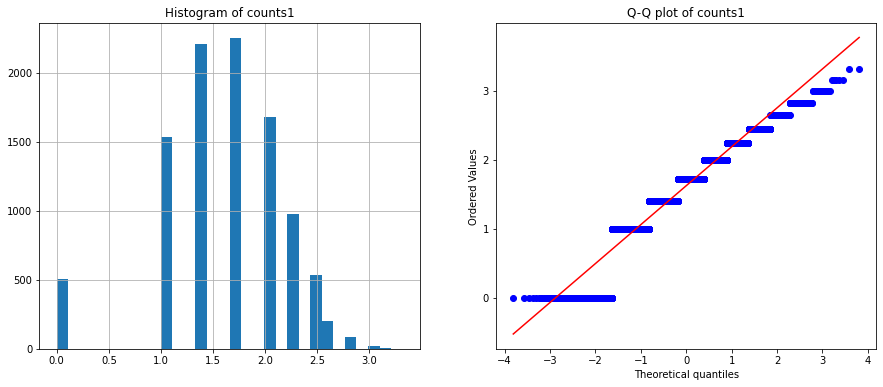

In [220]:
diagnostic_plots(df_tf, "counts1")

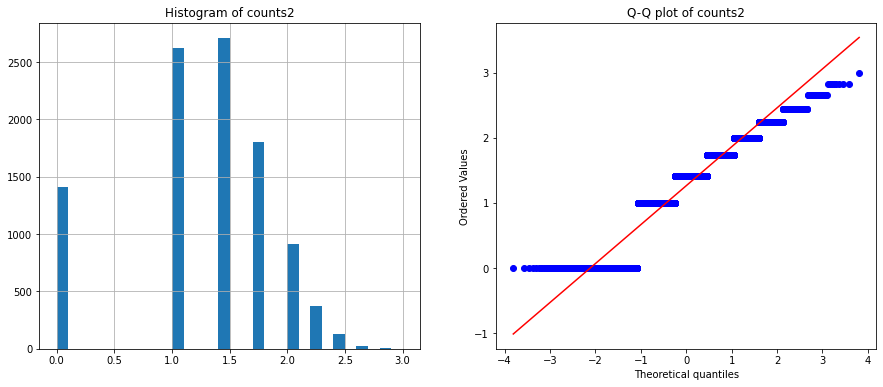

In [221]:
diagnostic_plots(df_tf, "counts2")

## Square root with Scikit-learn

In [222]:
from sklearn.preprocessing import FunctionTransformer

In [223]:
# make a copy of the data

df_tf = df.copy()

In [224]:
# set up transformer with desired operations

transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [225]:
# transform slice of dataframe with variables to transform

df_tf = transformer.transform(df[["counts1", "counts2"]])

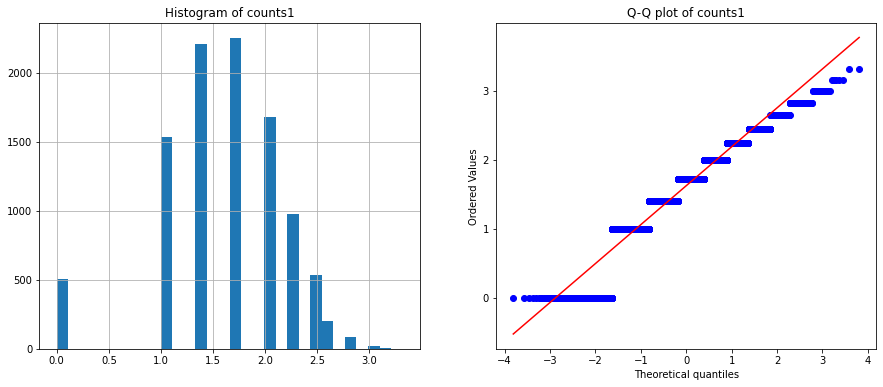

In [226]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

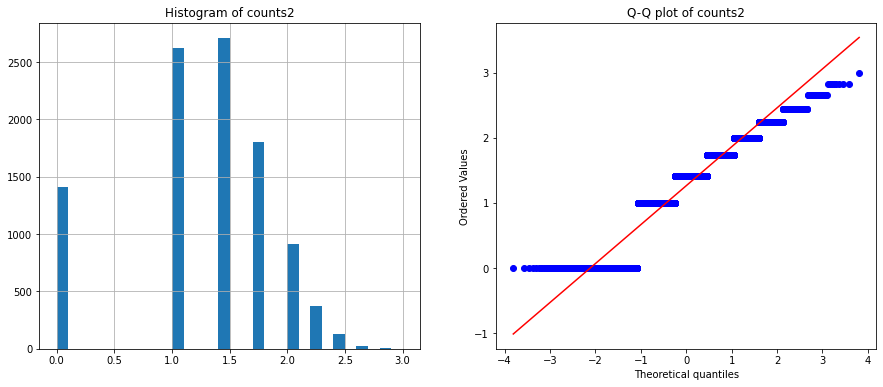

In [227]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")

# Power transformation

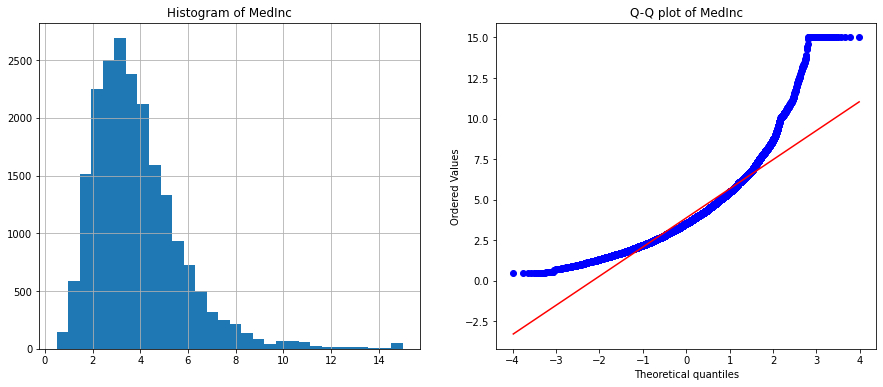

In [228]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(X, "MedInc")

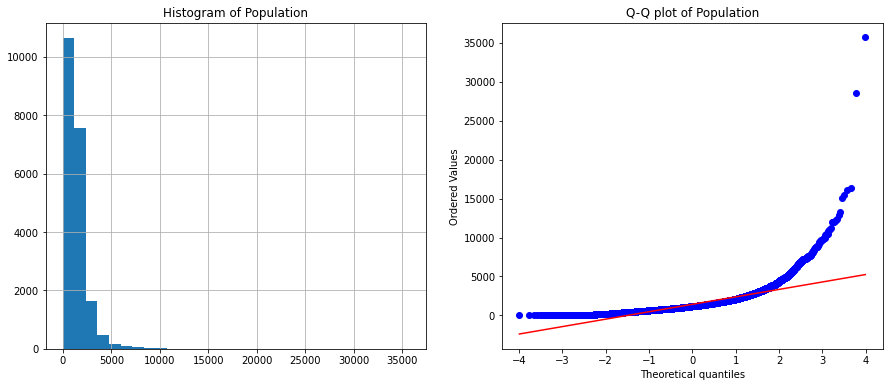

In [229]:
diagnostic_plots(X, "Population")

## Power transformation with NumPy

In [230]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [231]:
# make a list with the variables to transform

variables = ["MedInc", "Population"]

In [232]:
# apply a 0.3 exponent power transformation to a set of variables

X_tf[variables] = np.power(X[variables], 0.3)

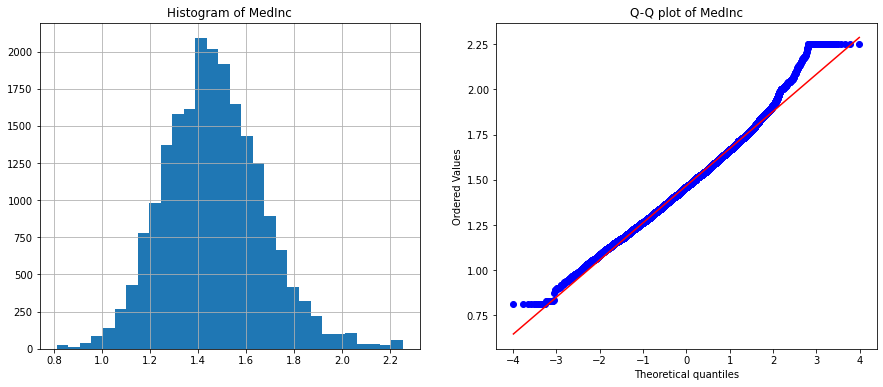

In [233]:
# check the distribution of the transformed variable

diagnostic_plots(X_tf, "MedInc")

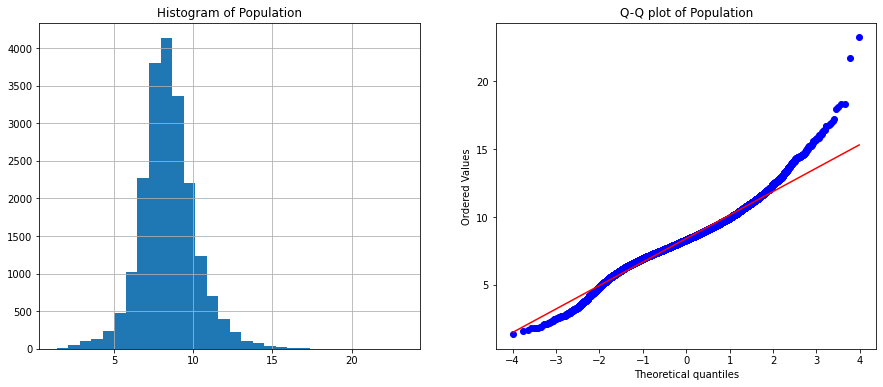

In [234]:
diagnostic_plots(X_tf, "Population")

## Power transformation with Scikit-learn

In [235]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [236]:
# set up the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

In [237]:
# transform slice of dataframe with indicated variables

X_tf[variables] = transformer.transform(X[variables])

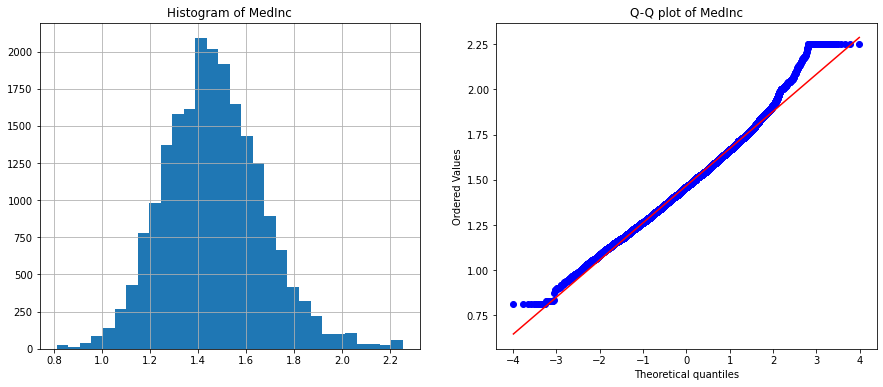

In [238]:
# visualize the transformation (not in book)

diagnostic_plots(X_tf, "MedInc")

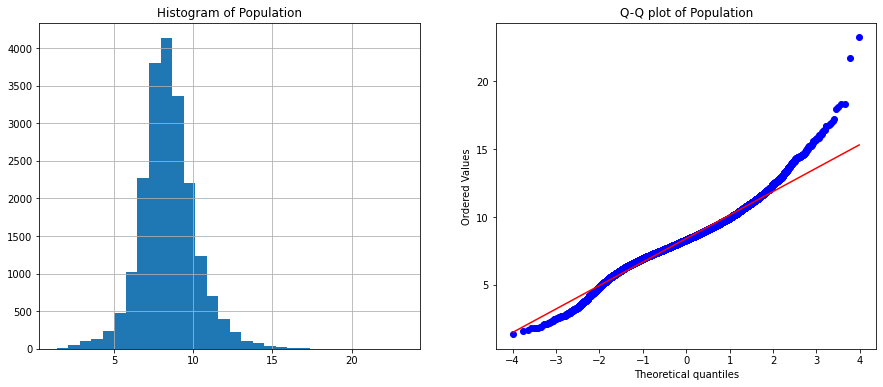

In [239]:
diagnostic_plots(X_tf, "Population")

# Box-Cox transformation

In [240]:
from sklearn.preprocessing import PowerTransformer

In [241]:
# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


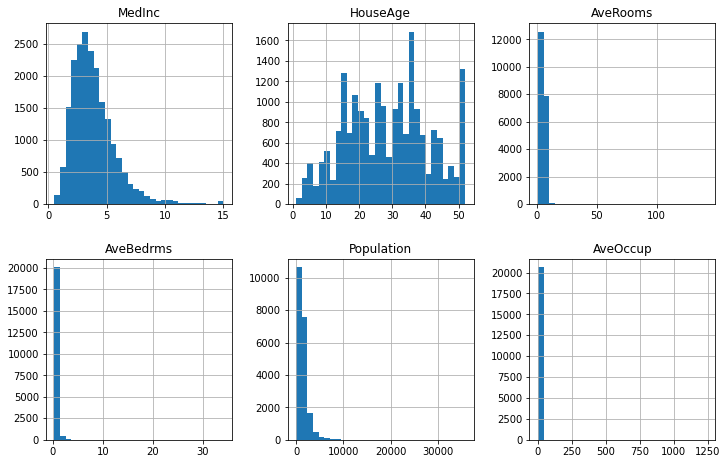

In [242]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [243]:
# capture variable names in a list

variables = list(X.columns)
variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [244]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

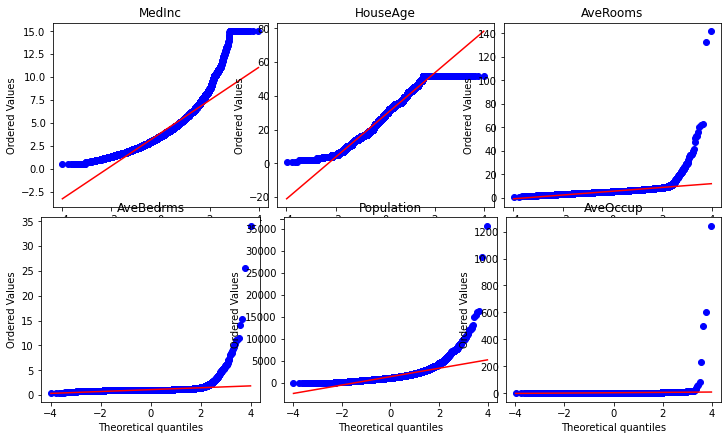

In [245]:
make_qqplot(X)

## Box-Cox transformation with Scikit-learn

In [246]:
# initialize the transformer with box-cox

transformer = PowerTransformer(method="box-cox", standardize=False)

In [247]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [248]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [249]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

array([[ 2.33706858e+00,  2.37232164e+01,  1.47534996e+00,
         2.30852288e-02,  1.23081165e+01,  7.56645476e-01],
       [ 2.33359826e+00,  1.32869543e+01,  1.41097764e+00,
        -2.91954350e-02,  2.23353410e+01,  6.28291074e-01],
       [ 2.17169053e+00,  2.90174591e+01,  1.56886594e+00,
         6.69359792e-02,  1.40826537e+01,  8.14314548e-01],
       ...,
       [ 5.43627084e-01,  1.10039339e+01,  1.30322965e+00,
         1.03551405e-01,  1.74122740e+01,  6.94971200e-01],
       [ 6.42492996e-01,  1.15834800e+01,  1.31757456e+00,
         1.39801581e-01,  1.59016207e+01,  6.32710121e-01],
       [ 9.06073643e-01,  1.04178493e+01,  1.30897227e+00,
         1.33369186e-01,  1.91100827e+01,  7.71751676e-01]])

In [250]:
# transform NumPy array to pandas dataframe

X_tf = pd.DataFrame(X_tf, columns=variables)

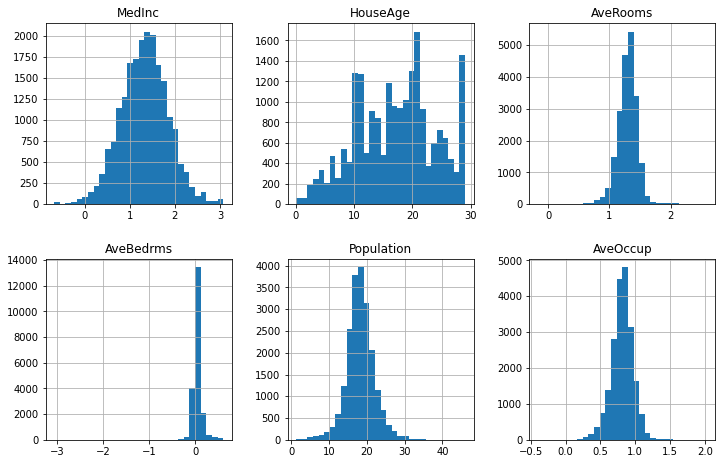

In [251]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

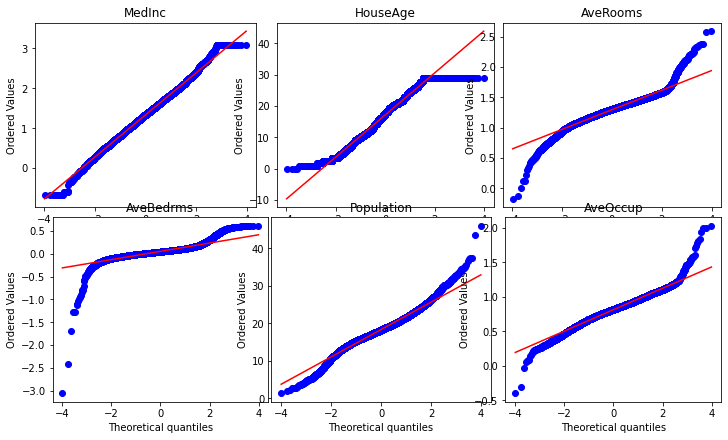

In [252]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)

# Yeo-Johnson transformation

In [253]:
# initialize a transformer with yeo-johnson

transformer = PowerTransformer(method="yeo-johnson", standardize=False)

In [254]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(standardize=False)

In [255]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([-0.19850992,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134561])

In [256]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

array([[ 1.8035986 , 24.13344395,  1.23437156,  0.21730344, 12.22322374,
         0.7558211 ],
       [ 1.80195764, 13.80736684,  1.20246042,  0.21606014, 22.08794362,
         0.71044476],
       [ 1.72457851, 29.38077791,  1.28031155,  0.21834124, 13.97068781,
         0.77657018],
       ...,
       [ 0.9014624 , 11.55509421,  1.14875904,  0.21920155, 17.2479839 ,
         0.7338578 ],
       [ 0.95050152, 12.12644493,  1.15591917,  0.22004504, 15.76140519,
         0.71198436],
       [ 1.08383359, 10.97761774,  1.15162557,  0.21989608, 18.91795897,
         0.76123875]])

In [257]:
# transform NumPy array to pandas dataframe

X_tf = pd.DataFrame(X_tf, columns=variables)

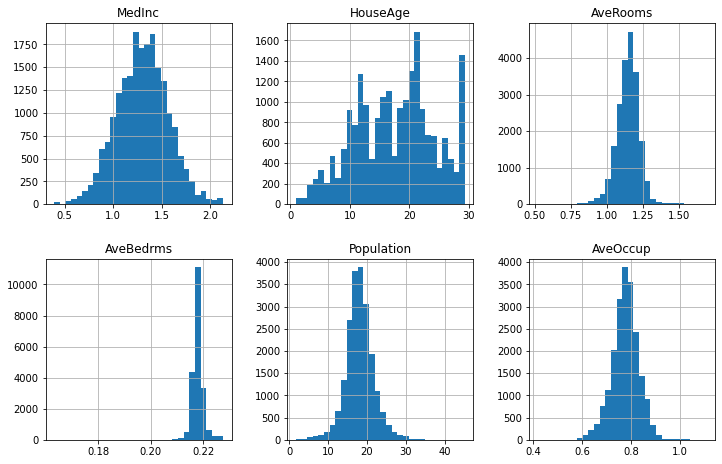

In [258]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

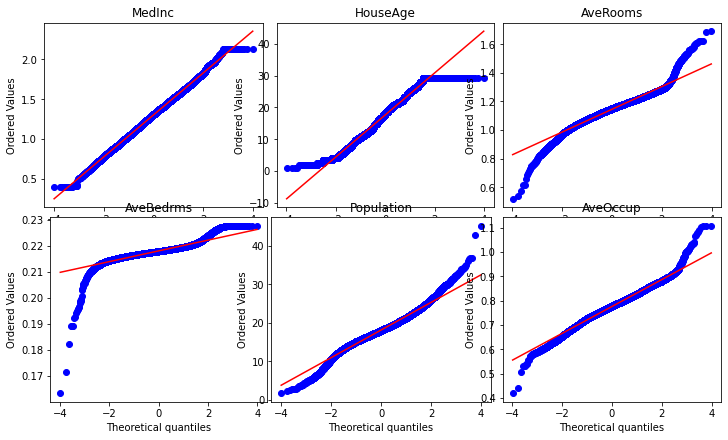

In [259]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)